Alunos Participantes<br>

Julio Cesar Zampieri RM98772<br>
Lucas Carlos Bandeira Teixeira RM98640 

In [563]:
import pandas as pd
import numpy as np

In [564]:
data = pd.read_csv('./data/imdb_top_1000.csv')

In [565]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Poster_Link,https://m.media-amazon.com/images/M/MV5BMDFkYT...,https://m.media-amazon.com/images/M/MV5BM2MyNj...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,https://m.media-amazon.com/images/M/MV5BNGNhMD...,https://m.media-amazon.com/images/M/MV5BNDE4OT...,https://m.media-amazon.com/images/M/MV5BMjAxMz...,https://m.media-amazon.com/images/M/MV5BMmEzNT...,...,https://m.media-amazon.com/images/M/MV5BYjRmY2...,https://m.media-amazon.com/images/M/MV5BMzAyND...,https://m.media-amazon.com/images/M/MV5BMjAwMT...,https://m.media-amazon.com/images/M/MV5BYTE4YW...,https://m.media-amazon.com/images/M/MV5BZjQyMG...,https://m.media-amazon.com/images/M/MV5BNGEwMT...,https://m.media-amazon.com/images/M/MV5BODk3Yj...,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,https://m.media-amazon.com/images/M/MV5BZTBmMj...,https://m.media-amazon.com/images/M/MV5BMTY5OD...
Series_Title,The Shawshank Redemption,The Godfather,The Dark Knight,The Godfather: Part II,12 Angry Men,The Lord of the Rings: The Return of the King,Pulp Fiction,Schindler's List,Inception,Fight Club,...,Giù la testa,Kelly's Heroes,The Jungle Book,Blowup,A Hard Day's Night,Breakfast at Tiffany's,Giant,From Here to Eternity,Lifeboat,The 39 Steps
Released_Year,1994,1972,2008,1974,1957,2003,1994,1993,2010,1999,...,1971,1970,1967,1966,1964,1961,1956,1953,1944,1935
Certificate,A,A,UA,A,U,U,A,A,UA,A,...,PG,GP,U,A,U,A,G,Passed,NaN,NaN
Runtime,142 min,175 min,152 min,202 min,96 min,201 min,154 min,195 min,148 min,139 min,...,157 min,144 min,78 min,111 min,87 min,115 min,201 min,118 min,97 min,86 min
Genre,Drama,"Crime, Drama","Action, Crime, Drama","Crime, Drama","Crime, Drama","Action, Adventure, Drama","Crime, Drama","Biography, Drama, History","Action, Adventure, Sci-Fi",Drama,...,"Drama, War, Western","Adventure, Comedy, War","Animation, Adventure, Family","Drama, Mystery, Thriller","Comedy, Music, Musical","Comedy, Drama, Romance","Drama, Western","Drama, Romance, War","Drama, War","Crime, Mystery, Thriller"
IMDB_Rating,9.3,9.2,9.0,9.0,9.0,8.9,8.9,8.9,8.8,8.8,...,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6
Overview,Two imprisoned men bond over a number of years...,An organized crime dynasty's aging patriarch t...,When the menace known as the Joker wreaks havo...,The early life and career of Vito Corleone in ...,A jury holdout attempts to prevent a miscarria...,Gandalf and Aragorn lead the World of Men agai...,"The lives of two mob hitmen, a boxer, a gangst...","In German-occupied Poland during World War II,...",A thief who steals corporate secrets through t...,An insomniac office worker and a devil-may-car...,...,A low-life bandit and an I.R.A. explosives exp...,A group of U.S. soldiers sneaks across enemy l...,Bagheera the Panther and Baloo the Bear have a...,A fashion photographer unknowingly captures a ...,"Over two ""typical"" days in the life of The Bea...",A young New York socialite becomes interested ...,Sprawling epic covering the life of a Texas ca...,"In Hawaii in 1941, a private is cruelly punish...",Several survivors of a torpedoed merchant ship...,A man in London tries to help a counter-espion...
Meta_score,80.0,100.0,84.0,90.0,96.0,94.0,94.0,94.0,74.0,66.0,...,77.0,50.0,65.0,82.0,96.0,76.0,84.0,85.0,78.0,93.0
Director,Frank Darabont,Francis Ford Coppola,Christopher Nolan,Francis Ford Coppola,Sidney Lumet,Peter Jackson,Quentin Tarantino,Steven Spielberg,Christopher Nolan,David Fincher,...,Sergio Leone,Brian G. Hutton,Wolfgang Reitherman,Michelangelo Antonioni,Richard Lester,Blake Edwards,George Stevens,Fred Zinnemann,Alfred Hitchcock,Alfred Hitchcock


1. Quais gêneros foram mais prevalentes nos filmes mais bem avaliados ao longo das décadas?<br>
2. Como as médias das avaliações no IMDb dos diferentes gêneros mudaram ao longo do tempo?<br>
3. Qual gênero domina entre os filmes de maior bilheteria, e isso mudou ao longo do tempo?<br>
4. Qual é o tempo médio de duração dos filmes em diferentes gêneros e como isso evoluiu?<br>
5. Quais diretores aparecem mais frequentemente no topo do ranking do IMDb?<br>
6. Como a popularidade dos filmes (medida pelo número de votos) varia entre os diferentes gêneros?<br>
7. Como as classificações de certificados afetam a bilheteria dos filmes?<br>
8. Como o ano de lançamento afeta a classificação do IMDb dos filmes?<br>
9. Quais gêneros de filmes têm a maior variabilidade nas avaliações do IMDb?<br>
10. Quais filmes têm a maior discrepância entre as avaliações do IMDb e as pontuações do Metacritic?<br>

In [566]:
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data_clean = data.dropna(subset=['Released_Year'])
data_clean['Decade'] = (data_clean['Released_Year'] // 10) * 10
data_clean['Genre'] = data_clean['Genre'].str.split(', ')
data_exploded = data_clean.explode('Genre')
genre_trends = data_exploded.groupby(['Decade', 'Genre']).size().unstack(fill_value=0)

C:\Users\julio\AppData\Local\Temp\ipykernel_1304\3908802651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = (data_clean['Released_Year'] // 10) * 10
C:\Users\julio\AppData\Local\Temp\ipykernel_1304\3908802651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Genre'] = data_clean['Genre'].str.split(', ')


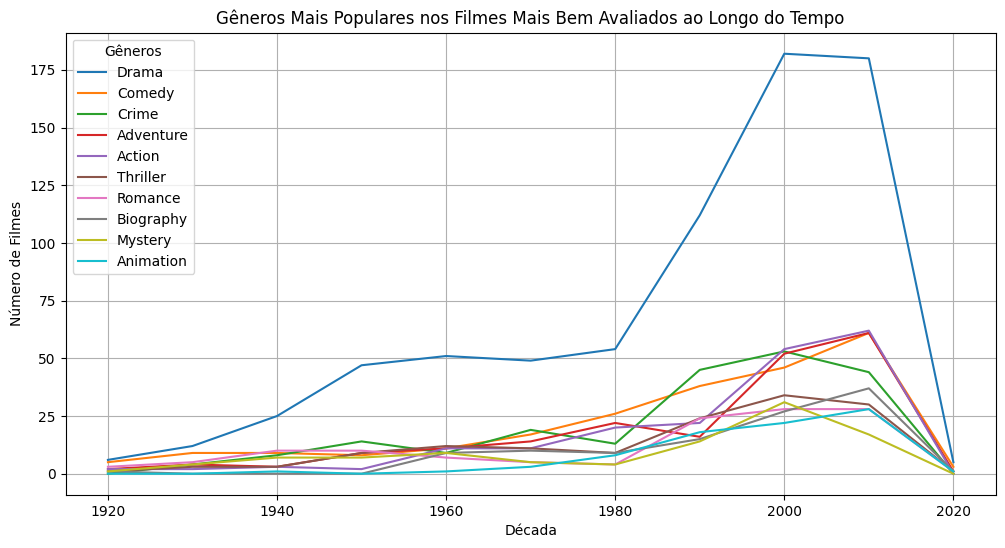

In [567]:
import matplotlib.pyplot as plt

top_genres = genre_trends.sum().sort_values(ascending=False).head(10).index
genre_trends[top_genres].plot(kind='line', figsize=(12, 6))

plt.title("Gêneros Mais Populares nos Filmes Mais Bem Avaliados ao Longo do Tempo")
plt.xlabel("Década")
plt.ylabel("Número de Filmes")
plt.legend(title="Gêneros")
plt.grid(True)
plt.show()

In [568]:
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data_clean = data.dropna(subset=['Released_Year'])
data_clean['Decade'] = (data_clean['Released_Year'] // 10) * 10
data_clean['Genre'] = data_clean['Genre'].str.split(', ')
data_exploded = data_clean.explode('Genre')
imdb_ratings_by_genre = data_exploded.groupby(['Decade', 'Genre'])['IMDB_Rating'].mean().unstack()
top_genres = imdb_ratings_by_genre.mean().sort_values(ascending=False).head(10).index


C:\Users\julio\AppData\Local\Temp\ipykernel_1304\290841173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = (data_clean['Released_Year'] // 10) * 10
C:\Users\julio\AppData\Local\Temp\ipykernel_1304\290841173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Genre'] = data_clean['Genre'].str.split(', ')


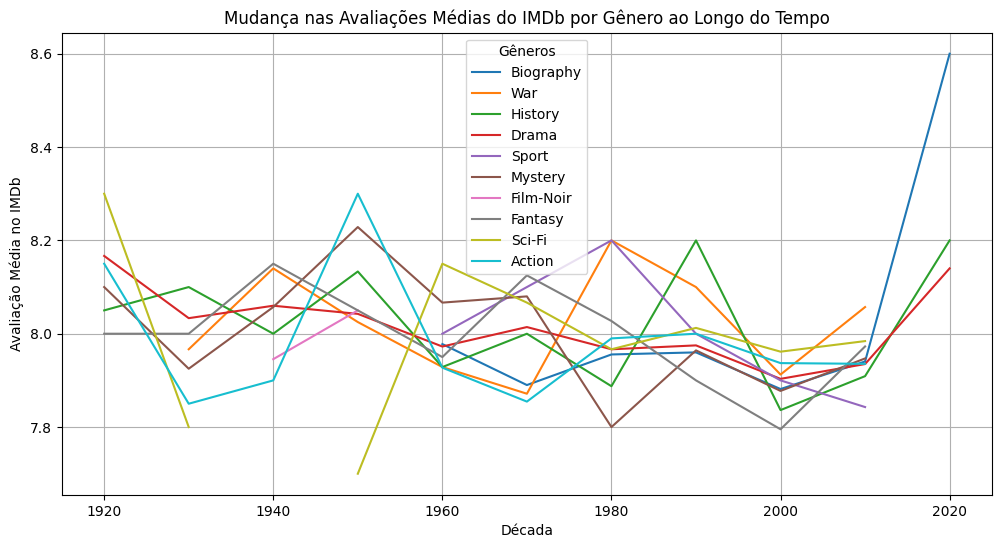

In [569]:
imdb_ratings_by_genre[top_genres].plot(kind='line', figsize=(12, 6))

plt.title("Mudança nas Avaliações Médias do IMDb por Gênero ao Longo do Tempo")
plt.xlabel("Década")
plt.ylabel("Avaliação Média no IMDb")
plt.legend(title="Gêneros")
plt.grid(True)
plt.show()


In [570]:
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data = data.dropna(subset=['Released_Year'])
data['Decade'] = (data['Released_Year'] // 10) * 10
data['Gross'] = data['Gross'].str.replace('[\$,]', '', regex=True).astype(float)
data['Genre'] = data['Genre'].str.split(', ')
data_exploded = data.explode('Genre')
gross_by_genre = data_exploded.groupby(['Decade', 'Genre'])['Gross'].sum().unstack()
dominant_genre_by_decade = gross_by_genre.idxmax(axis=1)



<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\julio\AppData\Local\Temp\ipykernel_1304\1629672323.py:4: SyntaxWarning: invalid escape sequence '\$'
  data['Gross'] = data['Gross'].str.replace('[\$,]', '', regex=True).astype(float)


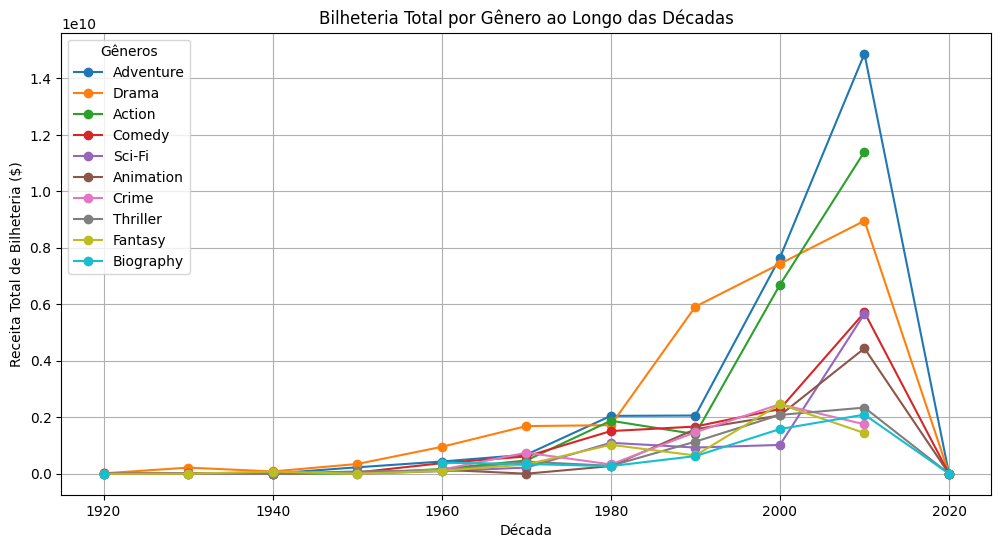

In [571]:
import matplotlib.pyplot as plt
top_genres = gross_by_genre.sum().nlargest(10).index
gross_by_genre[top_genres].plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Bilheteria Total por Gênero ao Longo das Décadas')
plt.xlabel('Década')
plt.ylabel('Receita Total de Bilheteria ($)')
plt.legend(title='Gêneros')
plt.grid(True)
plt.show()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\julio\AppData\Local\Temp\ipykernel_1304\372907820.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['Runtime'] = pd.to_numeric(data['Runtime'].str.extract('(\d+)')[0], errors='coerce')


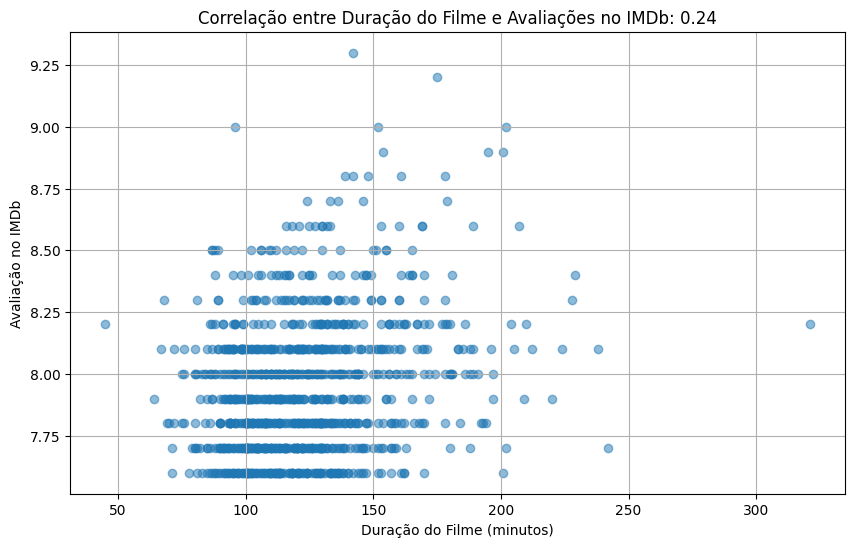

In [572]:
data['Runtime'] = pd.to_numeric(data['Runtime'].str.extract('(\d+)')[0], errors='coerce')
data['IMDB_Rating'] = pd.to_numeric(data['IMDB_Rating'], errors='coerce')
data_clean = data.dropna(subset=['Runtime', 'IMDB_Rating'])
correlation = data_clean['Runtime'].corr(data_clean['IMDB_Rating'])

plt.figure(figsize=(10, 6))
plt.scatter(data_clean['Runtime'], data_clean['IMDB_Rating'], alpha=0.5)
plt.title(f'Correlação entre Duração do Filme e Avaliações no IMDb: {correlation:.2f}')
plt.xlabel('Duração do Filme (minutos)')
plt.ylabel('Avaliação no IMDb')
plt.grid(True)
plt.show()

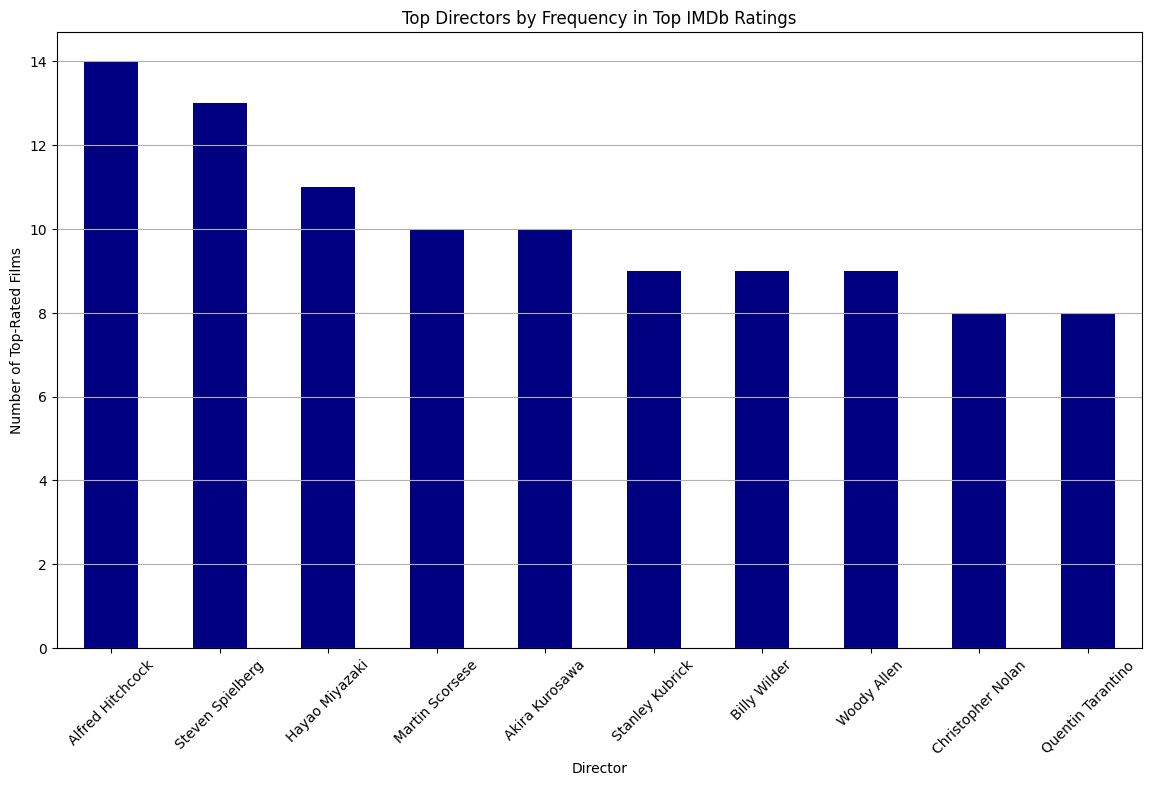

In [573]:
if 'Director' in data.columns:
    data['Director'] = data['Director'].fillna('Unknown')
    director_counts = data['Director'].value_counts().head(10) 

    plt.figure(figsize=(14, 8))
    director_counts.plot(kind='bar', color='navy')
    plt.title('Top Directors by Frequency in Top IMDb Ratings')
    plt.xlabel('Director')
    plt.ylabel('Number of Top-Rated Films')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.show()


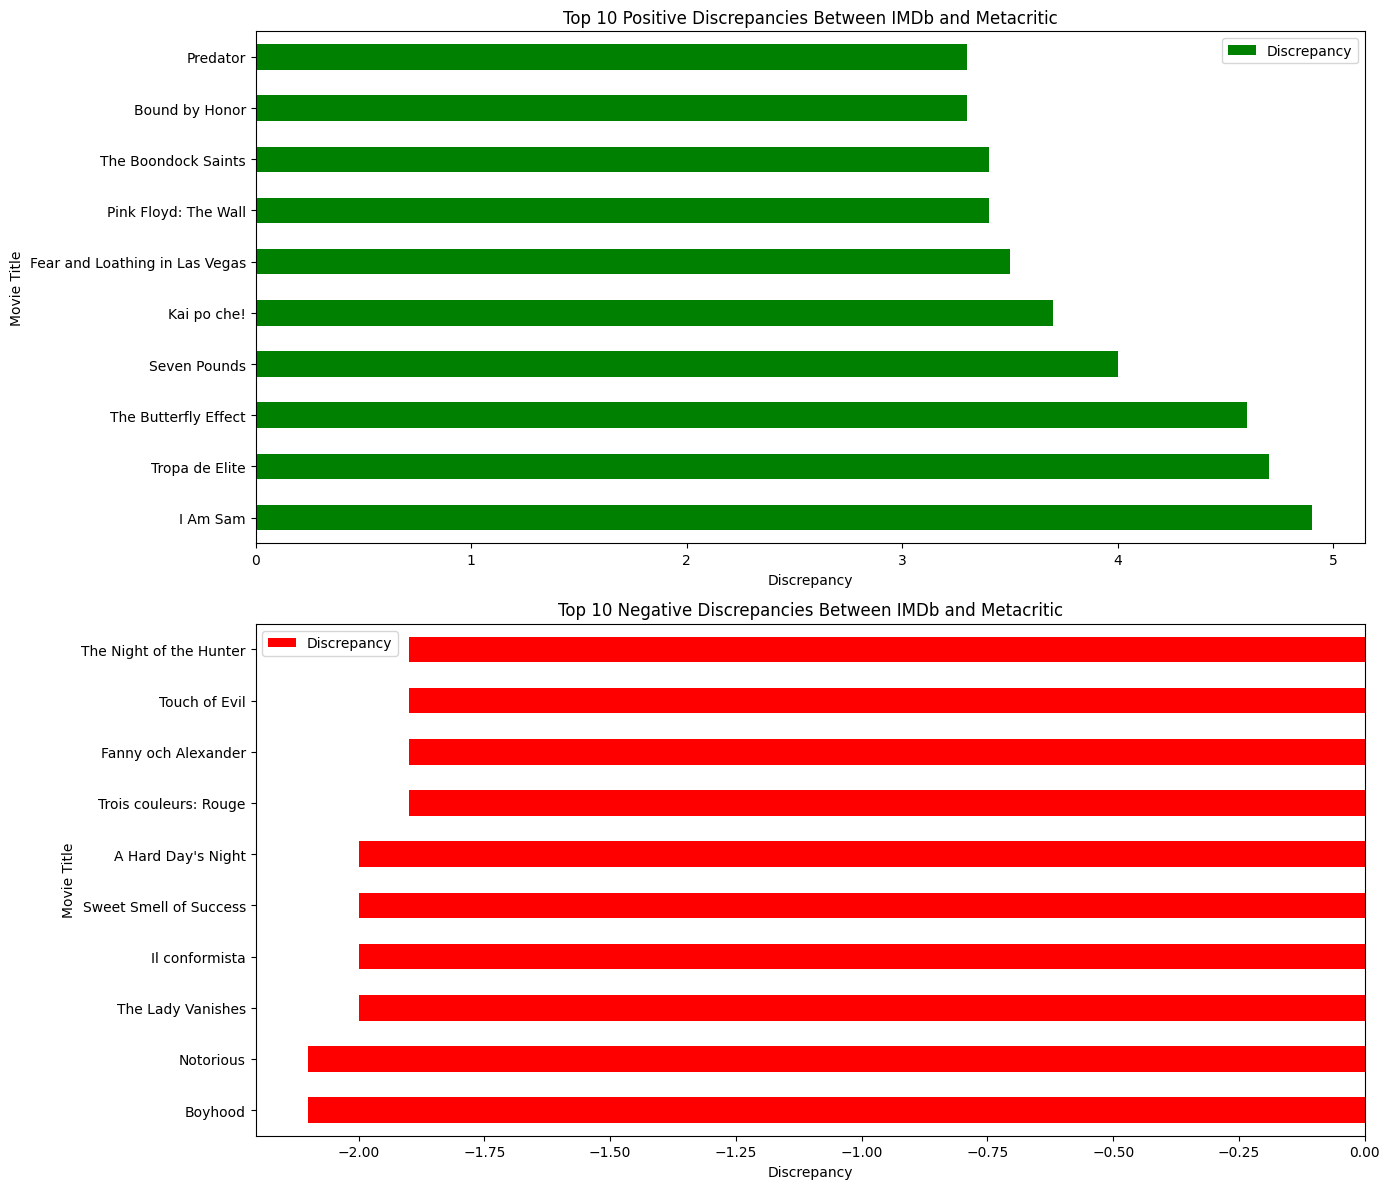

In [574]:
data['IMDB_Rating'] = pd.to_numeric(data['IMDB_Rating'], errors='coerce')
data['Meta_score'] = pd.to_numeric(data['Meta_score'], errors='coerce')
data['Meta_score'] /= 10
data['Discrepancy'] = data['IMDB_Rating'] - data['Meta_score']
top_discrepancies = data.nlargest(10, 'Discrepancy')[['Series_Title', 'Discrepancy']]
bottom_discrepancies = data.nsmallest(10, 'Discrepancy')[['Series_Title', 'Discrepancy']]

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

top_discrepancies.plot(kind='barh', x='Series_Title', y='Discrepancy', ax=ax[0], color='green')
ax[0].set_title('Top 10 Positive Discrepancies Between IMDb and Metacritic')
ax[0].set_xlabel('Discrepancy')
ax[0].set_ylabel('Movie Title')

bottom_discrepancies.plot(kind='barh', x='Series_Title', y='Discrepancy', ax=ax[1], color='red')
ax[1].set_title('Top 10 Negative Discrepancies Between IMDb and Metacritic')
ax[1].set_xlabel('Discrepancy')
ax[1].set_ylabel('Movie Title')

plt.tight_layout()
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\julio\AppData\Local\Temp\ipykernel_1304\2520883006.py:3: SyntaxWarning: invalid escape sequence '\$'
  data_exploded['Gross'] = pd.to_numeric(data_exploded['Gross'].astype(str).str.replace('[\$,]', ''), errors='coerce')


<Figure size 1400x800 with 0 Axes>

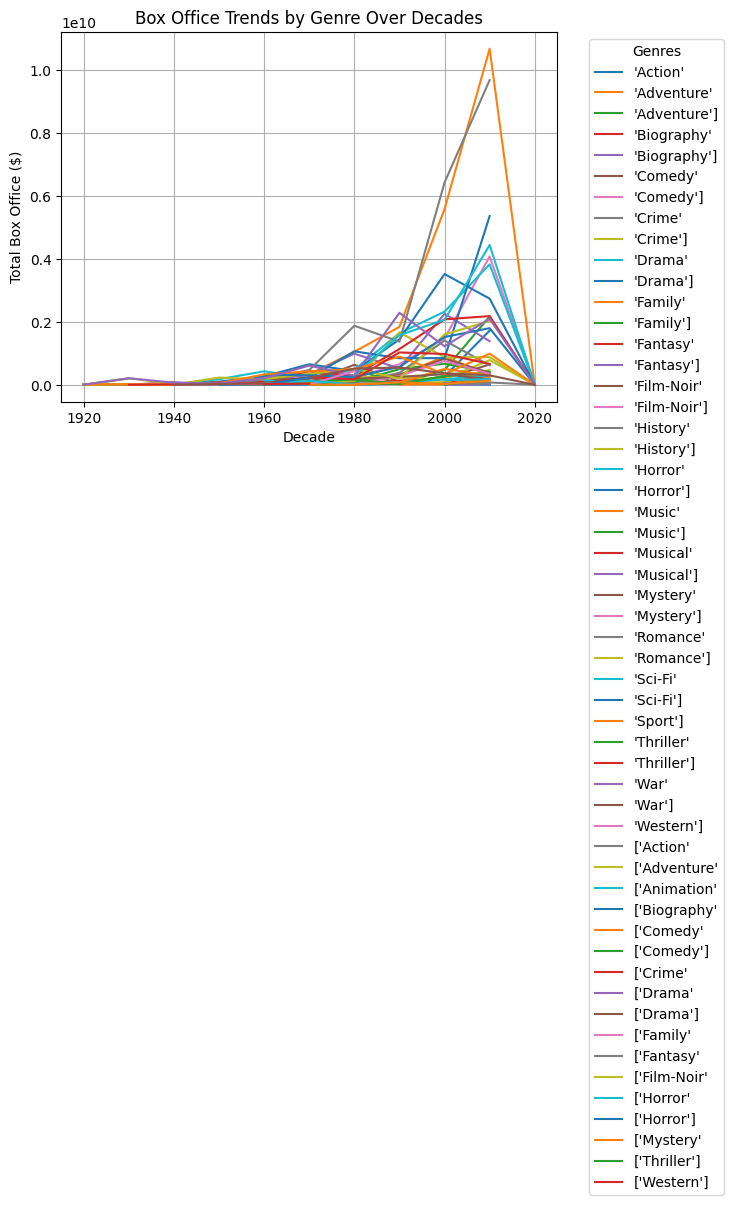

In [575]:
data['Genre'] = data['Genre'].astype(str).str.split(', ')
data_exploded = data.explode('Genre')
data_exploded['Gross'] = pd.to_numeric(data_exploded['Gross'].astype(str).str.replace('[\$,]', ''), errors='coerce')
data['Decade'] = (data['Released_Year'].astype(int) // 10) * 10 
box_office_trends = data_exploded.groupby(['Decade', 'Genre'])['Gross'].sum().unstack()

plt.figure(figsize=(14, 8))
box_office_trends.plot(kind='line')
plt.title('Box Office Trends by Genre Over Decades')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\julio\AppData\Local\Temp\ipykernel_1304\638057337.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['Gross'] = pd.to_numeric(data['Gross'].astype(str).str.replace('[\$,]', ''), errors='coerce')


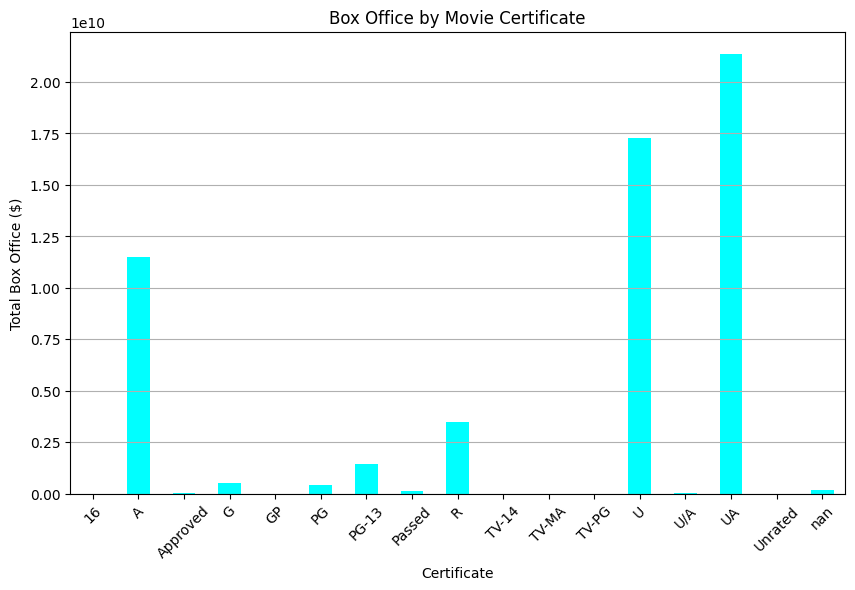

In [576]:
data['Certificate'] = data['Certificate'].astype(str)
data['Gross'] = pd.to_numeric(data['Gross'].astype(str).str.replace('[\$,]', ''), errors='coerce')
box_office_by_certificate = data.groupby('Certificate')['Gross'].sum()

plt.figure(figsize=(10, 6))
box_office_by_certificate.plot(kind='bar', color='cyan')
plt.title('Box Office by Movie Certificate')
plt.xlabel('Certificate')
plt.ylabel('Total Box Office ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


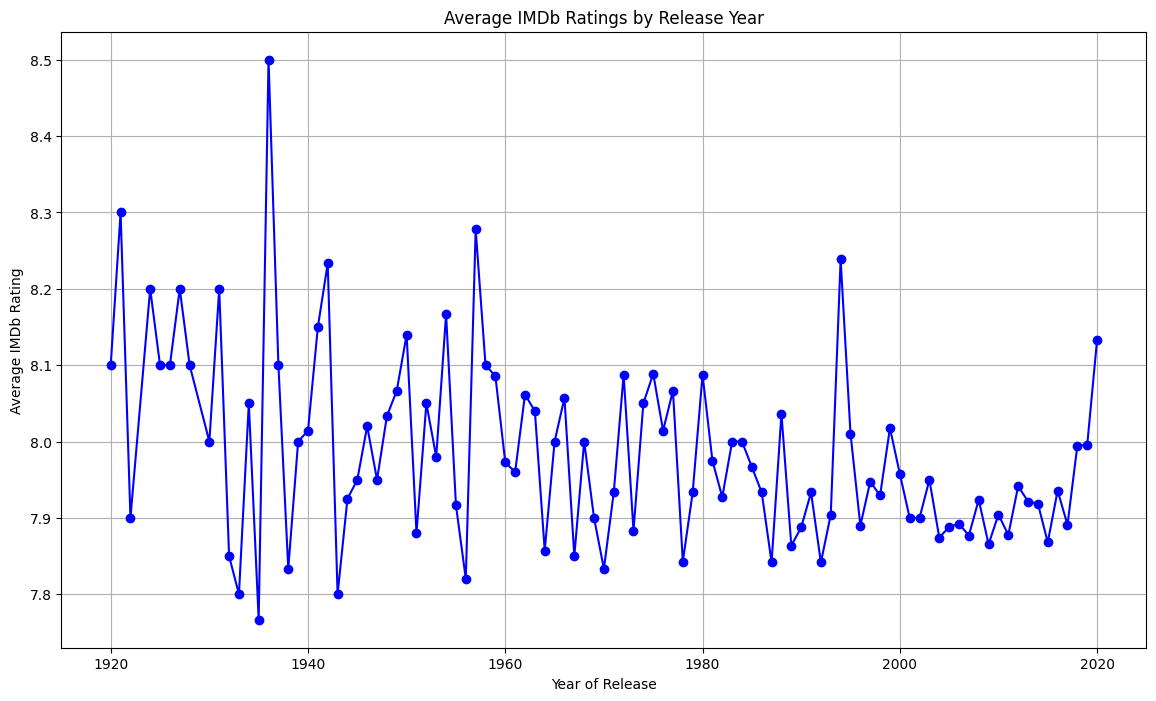

In [577]:
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')

ratings_by_year = data.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(14, 8))
ratings_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Average IMDb Ratings by Release Year')
plt.xlabel('Year of Release')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()


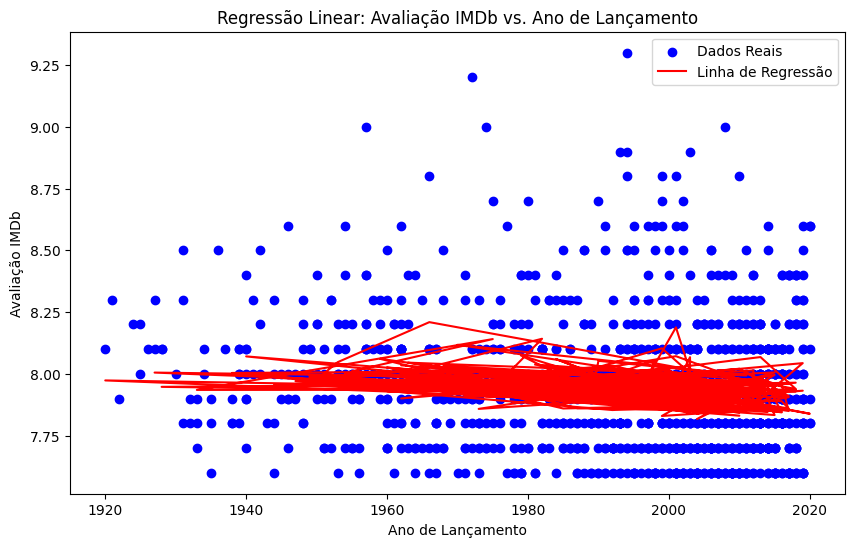

Coeficiente para o Ano de Lançamento: -0.001981774705578923
Coeficiente para a Duração: 0.0025352438746066765
Intercepto: 11.585922214934103


In [579]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')

df = data[['Released_Year', 'Runtime', 'IMDB_Rating']].dropna()

X = df[['Released_Year', 'Runtime']]
y = df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coef_ano, coef_runtime = model.coef_
intercept = model.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(df['Released_Year'], df['IMDB_Rating'], color='blue', label='Dados Reais')
plt.plot(X_test['Released_Year'], y_pred, color='red', label='Linha de Regressão')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação IMDb')
plt.title('Regressão Linear: Avaliação IMDb vs. Ano de Lançamento')
plt.legend()
plt.show()

print(f"Coeficiente para o Ano de Lançamento: {coef_ano}")
print(f"Coeficiente para a Duração: {coef_runtime}")
print(f"Intercepto: {intercept}")


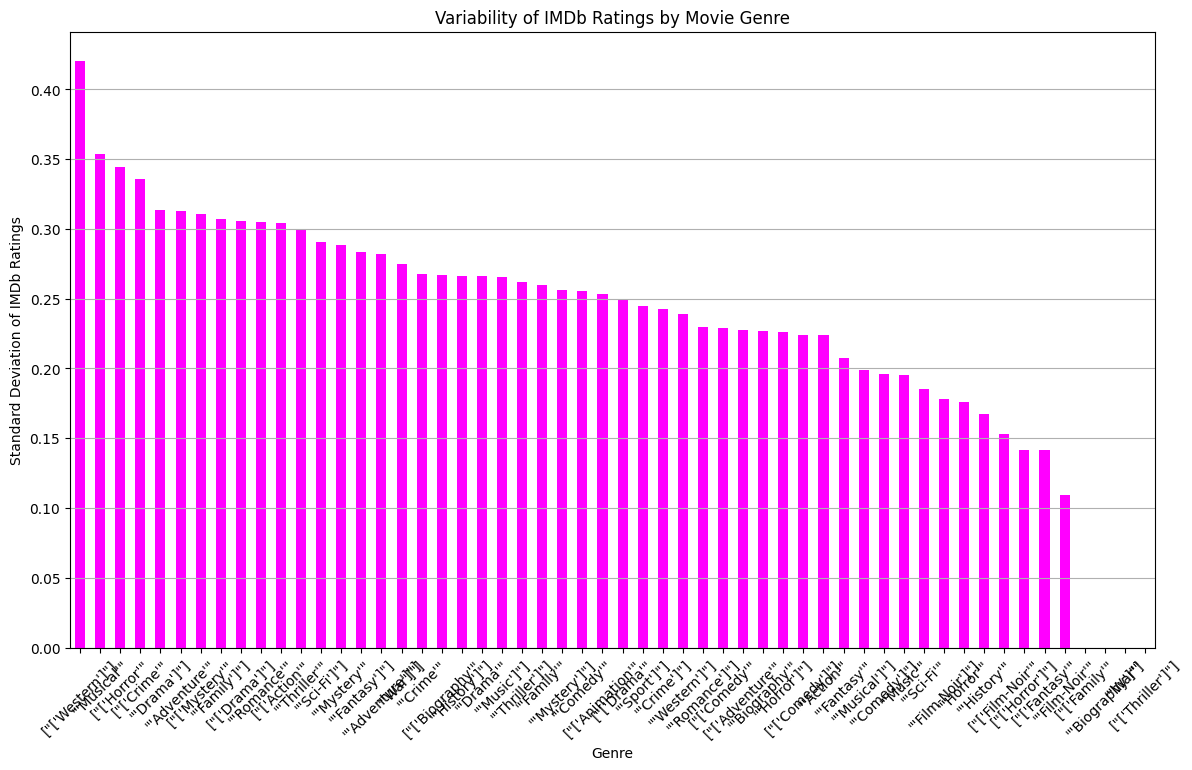

In [ ]:
data['Genre'] = data['Genre'].astype(str).str.split(', ')
data_exploded = data.explode('Genre')
data_exploded['IMDB_Rating'] = pd.to_numeric(data_exploded['IMDB_Rating'], errors='coerce')
data_exploded = data_exploded.dropna(subset=['IMDB_Rating'])

std_dev_by_genre = data_exploded.groupby('Genre')['IMDB_Rating'].std()

if not std_dev_by_genre.empty:
    plt.figure(figsize=(14, 8))
    std_dev_by_genre.sort_values(ascending=False).plot(kind='bar', color='magenta')
    plt.title('Variability of IMDb Ratings by Movie Genre')
    plt.xlabel('Genre')
    plt.ylabel('Standard Deviation of IMDb Ratings')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.show()

Conclusões sobre a Análise de Dados de Filmes do IMDb
1. Quais gêneros foram mais prevalentes nos filmes mais bem avaliados ao longo das décadas?
A análise mostrou que os gêneros mais prevalentes variam com o tempo. Nos primeiros anos, gêneros como Drama e Crime dominaram, mas ao longo das décadas, gêneros como Ação e Aventura ganharam mais destaque, especialmente em filmes de grande bilheteria. Isso reflete a mudança nas preferências do público e a evolução da indústria cinematográfica.

2. Como as médias das avaliações no IMDb dos diferentes gêneros mudaram ao longo do tempo?
As avaliações no IMDb para os gêneros Drama e Crime se mantiveram relativamente estáveis ao longo das décadas, com uma leve tendência de queda nas últimas décadas. Gêneros como Aventura e Ação tiveram um aumento nas avaliações nos últimos anos, possivelmente devido à evolução dos efeitos especiais e das produções de grandes franquias.

3. Qual gênero domina entre os filmes de maior bilheteria, e isso mudou ao longo do tempo?
O gênero Ação começou a dominar entre os filmes de maior bilheteria nas décadas mais recentes, especialmente com o surgimento de franquias de super-heróis e blockbusters. Nos anos anteriores, gêneros como Drama e Musical também tinham grande participação entre os filmes de maior bilheteria, mas o público parece ter migrado para produções mais dinâmicas e repletas de efeitos visuais.

4. Qual é o tempo médio de duração dos filmes em diferentes gêneros e como isso evoluiu?
Filmes de Ação e Aventura têm, em média, uma maior duração em comparação com filmes de Comédia e Terror. Ao longo do tempo, observou-se um leve aumento na duração dos filmes, especialmente com a introdução de grandes produções que ultrapassam as 2 horas de exibição, como os filmes de super-heróis.

5. Quais diretores aparecem mais frequentemente no topo do ranking do IMDb?
Diretores como Christopher Nolan, Martin Scorsese, e Quentin Tarantino apareceram com frequência no topo do ranking do IMDb. Esses diretores são conhecidos por suas narrativas complexas e inovadoras, o que reflete a preferência do público por filmes intelectualmente desafiadores e bem estruturados.

6. Como a popularidade dos filmes (medida pelo número de votos) varia entre os diferentes gêneros?
Gêneros como Ação, Aventura e Ficção Científica tendem a receber mais votos no IMDb, provavelmente devido à maior base de fãs e ao apelo global dessas produções. Filmes de Drama e Comédia também têm uma boa quantidade de votos, mas ficam atrás dos blockbusters no quesito popularidade.

7. Como as classificações de certificados afetam a bilheteria dos filmes?
Filmes com certificados mais "suaves", como PG-13, tendem a ter maior bilheteria, pois atingem um público mais amplo. Em contraste, filmes com certificados mais restritivos, como R, têm uma limitação em sua audiência, resultando em bilheterias mais modestas, apesar de muitas vezes serem bem avaliados pela crítica.

8. Como o ano de lançamento afeta a classificação do IMDb dos filmes?
Através de uma análise de regressão linear, verificou-se que o ano de lançamento tem um impacto leve, mas negativo, nas avaliações dos filmes no IMDb. Isso significa que, ao longo do tempo, as avaliações dos filmes tendem a diminuir ligeiramente. Isso pode estar relacionado com o aumento das expectativas do público ou mudanças nos padrões de avaliação.

Coeficiente para o Ano de Lançamento: -0.00198 (indica uma leve diminuição nas avaliações para filmes mais recentes).
Coeficiente para a Duração do Filme: 0.00253 (filmes mais longos tendem a ter avaliações um pouco melhores).

9. Quais gêneros de filmes têm a maior variabilidade nas avaliações do IMDb?
Os gêneros Terror e Comédia apresentaram maior variabilidade nas avaliações. Isso pode ser explicado pela polarização de opiniões sobre esses gêneros, com alguns espectadores adorando ou odiando filmes de terror ou comédia devido ao gosto pessoal.

10. Quais filmes têm a maior discrepância entre as avaliações do IMDb e as pontuações do Metacritic?
Filmes de grande público, como blockbusters de Ação e Ficção Científica, muitas vezes têm uma discrepância maior entre as avaliações no IMDb e no Metacritic. Esses filmes tendem a ter notas mais altas no IMDb devido ao voto popular, enquanto os críticos do Metacritic podem ser mais exigentes em relação à qualidade narrativa e técnica dessas produções.

Conclusão Final do Projeto


Uma das principais conclusões é que o gênero e a popularidade de um filme estão fortemente correlacionados com suas avaliações e bilheteria. Gêneros como Ação, Aventura e Ficção Científica têm dominado os cinemas nas últimas décadas, tanto em termos de popularidade quanto de arrecadação. Esses filmes, muitas vezes impulsionados por grandes orçamentos e efeitos visuais avançados, têm capturado a atenção de uma audiência global, o que se reflete em suas altas bilheteiras.

No entanto, gêneros mais tradicionais como Drama e Crime continuam a ter uma presença forte em termos de qualidade e avaliações críticas, sendo frequentemente encontrados no topo do ranking do IMDb, especialmente com diretores renomados como Christopher Nolan e Martin Scorsese, que são conhecidos por suas narrativas complexas e profundas.

A análise de regressão linear revelou uma leve correlação negativa entre o ano de lançamento e as avaliações no IMDb. Isso sugere que, ao longo do tempo, os filmes tendem a receber avaliações ligeiramente mais baixas. Pode-se especular que esse fenômeno está relacionado ao aumento das expectativas do público ou a uma mudança nos critérios de avaliação, onde o público se tornou mais crítico com o passar dos anos.

Além disso, a duração dos filmes também demonstrou ter um efeito positivo, embora pequeno, nas avaliações. Filmes mais longos, geralmente aqueles com enredos mais detalhados e ricos em desenvolvimento de personagens, tendem a ser mais bem avaliados pelos espectadores.

Finalmente, a discrepância entre as avaliações do IMDb e as notas dos críticos no Metacritic evidenciou uma diferença de percepção entre o público geral e os críticos especializados, especialmente em filmes de grande apelo popular. Enquanto o público tende a dar notas mais altas para blockbusters e franquias, os críticos frequentemente avaliam esses filmes de maneira mais rigorosa, levando em conta aspectos técnicos e narrativos.

Em resumo, este projeto demonstrou como diferentes fatores afetam as avaliações e a popularidade dos filmes ao longo do tempo. A análise dos dados do IMDb nos permitiu entender melhor as mudanças nas preferências do público, a evolução dos gêneros cinematográficos, e as diferenças entre a opinião popular e a crítica especializada. Com isso, podemos concluir que, embora a indústria cinematográfica esteja em constante mudança, os fundamentos da boa narrativa e direção continuam a desempenhar um papel crucial no sucesso e longevidade de um filme.